In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv("stockData.csv")

# Checking some simple descriptors

In [4]:
data.head(5)

,Date,Investment,StockPrice,RetainedEarnings,DividendYield,MarketCap,Beta,EPS,ROE,CurrentRatio,QuickRatio,PayoutRatio,EV_to_EBITDA,ProfitMargin,Volatility
0,2020-01-01,87.454012,511.079757,11.542642,0.067270,6.147963e+06,1.090453,3.593028,0.057760,2.440536,1.413578,0.186820,12.995458,0.180861,0.244864
1,2020-01-02,145.071431,725.140568,11.174470,0.079668,8.248891e+06,1.210153,1.689545,0.087355,2.374566,1.025360,0.166456,7.068482,0.066007,0.053435
2,2020-01-03,123.199394,923.767502,27.656365,0.025047,7.841448e+06,1.781821,4.489578,0.216249,1.191508,1.224910,0.088077,13.868644,0.098466,0.239530
3,2020-01-04,109.865848,839.334932,11.238655,0.062487,2.385099e+06,1.010007,3.452465,0.203354,2.845145,0.936048,0.303633,9.721784,0.204736,0.123735
4,2020-01-05,65.601864,883.936689,11.798743,0.057175,2.343245e+06,1.804475,1.628816,0.120129,2.136944,1.130035,0.238312,5.785232,0.155737,0.052018


In [5]:
data.shape

(1000, 15)

In [4]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract relevant features from the date column
#data['Year'] = data['Date'].dt.year
#data['Month'] = data['Date'].dt.month
#data['Day'] = data['Date'].dt.day

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Investment        1000 non-null   float64       
 2   StockPrice        1000 non-null   float64       
 3   RetainedEarnings  1000 non-null   float64       
 4   DividendYield     1000 non-null   float64       
 5   MarketCap         1000 non-null   float64       
 6   Beta              1000 non-null   float64       
 7   EPS               1000 non-null   float64       
 8   ROE               1000 non-null   float64       
 9   CurrentRatio      1000 non-null   float64       
 10  QuickRatio        1000 non-null   float64       
 11  PayoutRatio       1000 non-null   float64       
 12  EV_to_EBITDA      1000 non-null   float64       
 13  ProfitMargin      1000 non-null   float64       
 14  Volatility        1000 no

In [18]:
#Removing dates from my dataset
data=data.drop('Day',axis=1)
data.head(5)

,Investment,StockPrice,RetainedEarnings,DividendYield,MarketCap,Beta,EPS,ROE,CurrentRatio,QuickRatio,PayoutRatio,EV_to_EBITDA,ProfitMargin,Volatility,Month
0,87.454012,511.079757,11.542642,0.067270,6.147963e+06,1.090453,3.593028,0.057760,2.440536,1.413578,0.186820,12.995458,0.180861,0.244864,1
1,145.071431,725.140568,11.174470,0.079668,8.248891e+06,1.210153,1.689545,0.087355,2.374566,1.025360,0.166456,7.068482,0.066007,0.053435,1
2,123.199394,923.767502,27.656365,0.025047,7.841448e+06,1.781821,4.489578,0.216249,1.191508,1.224910,0.088077,13.868644,0.098466,0.239530,1
3,109.865848,839.334932,11.238655,0.062487,2.385099e+06,1.010007,3.452465,0.203354,2.845145,0.936048,0.303633,9.721784,0.204736,0.123735,1
4,65.601864,883.936689,11.798743,0.057175,2.343245e+06,1.804475,1.628816,0.120129,2.136944,1.130035,0.238312,5.785232,0.155737,0.052018,1


In [19]:
data.isna().sum()

Investment          0
StockPrice          0
RetainedEarnings    0
DividendYield       0
MarketCap           0
Beta                0
EPS                 0
ROE                 0
CurrentRatio        0
QuickRatio          0
PayoutRatio         0
EV_to_EBITDA        0
ProfitMargin        0
Volatility          0
Month               0
dtype: int64

In [23]:
data.describe(include='all')

,Investment,StockPrice,RetainedEarnings,DividendYield,MarketCap,Beta,EPS,ROE,CurrentRatio,QuickRatio,PayoutRatio,EV_to_EBITDA,ProfitMargin,Volatility,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,99.025655,704.210383,17.560143,0.049038,5.446948e+06,1.247697,2.973235,0.146474,1.972993,0.996795,0.252846,12.578773,0.149483,0.148725,6.100000
std,29.213736,175.313936,7.266855,0.028649,2.581289e+06,0.433792,1.158935,0.056983,0.564469,0.282153,0.143227,4.442571,0.057564,0.058782,3.307407
min,50.463202,401.930958,5.000291,0.000065,1.000276e+06,0.509276,1.005713,0.050048,1.000486,0.500053,0.000472,5.002366,0.050241,0.050267,1.000000
25%,73.597327,544.644563,11.533774,0.024190,3.204766e+06,0.874070,1.960887,0.097198,1.498767,0.764144,0.126315,8.801566,0.099572,0.096967,3.000000
50%,99.680738,711.240344,17.515348,0.048428,5.451383e+06,1.235604,2.938572,0.146798,1.957402,0.995187,0.253183,12.416776,0.147968,0.146486,6.000000
75%,124.431959,856.279034,23.977588,0.073754,7.659941e+06,1.609778,4.025857,0.192893,2.431810,1.236217,0.378351,16.604877,0.200641,0.200417,9.000000
max,149.971767,999.648235,29.945521,0.099956,9.979745e+06,1.999025,4.997843,0.249781,2.992026,1.499505,0.499837,19.990027,0.249740,0.249769,12.000000


In [31]:
X_cols = [col for col in data.columns if col != 'StockPrice']


In [32]:
# Verify the data type of 'data'
print(f"Data type of 'data': {type(data)}")


Data type of 'data': <class 'pandas.core.frame.DataFrame'>


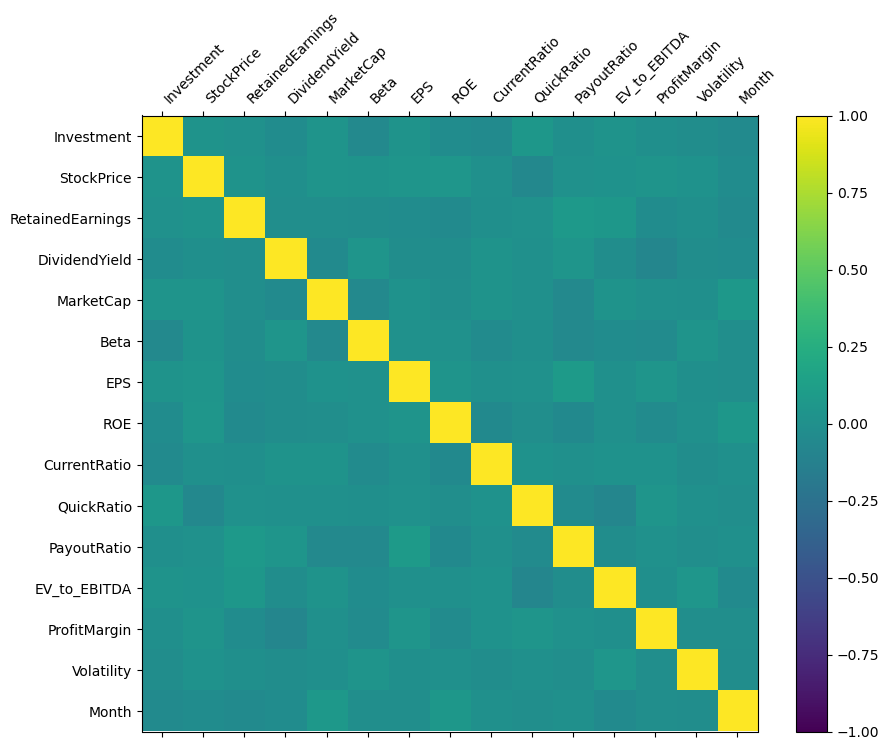

In [38]:
correlations = data.corr()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax =  ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Set xticks and yticks
ax.set_xticks(np.arange(len(data.columns)))
ax.set_yticks(np.arange(len(data.columns)))

# Set xticklabels and yticklabels
ax.set_xticklabels(data.columns, rotation=45, ha='left')
ax.set_yticklabels(data.columns)

plt.show()

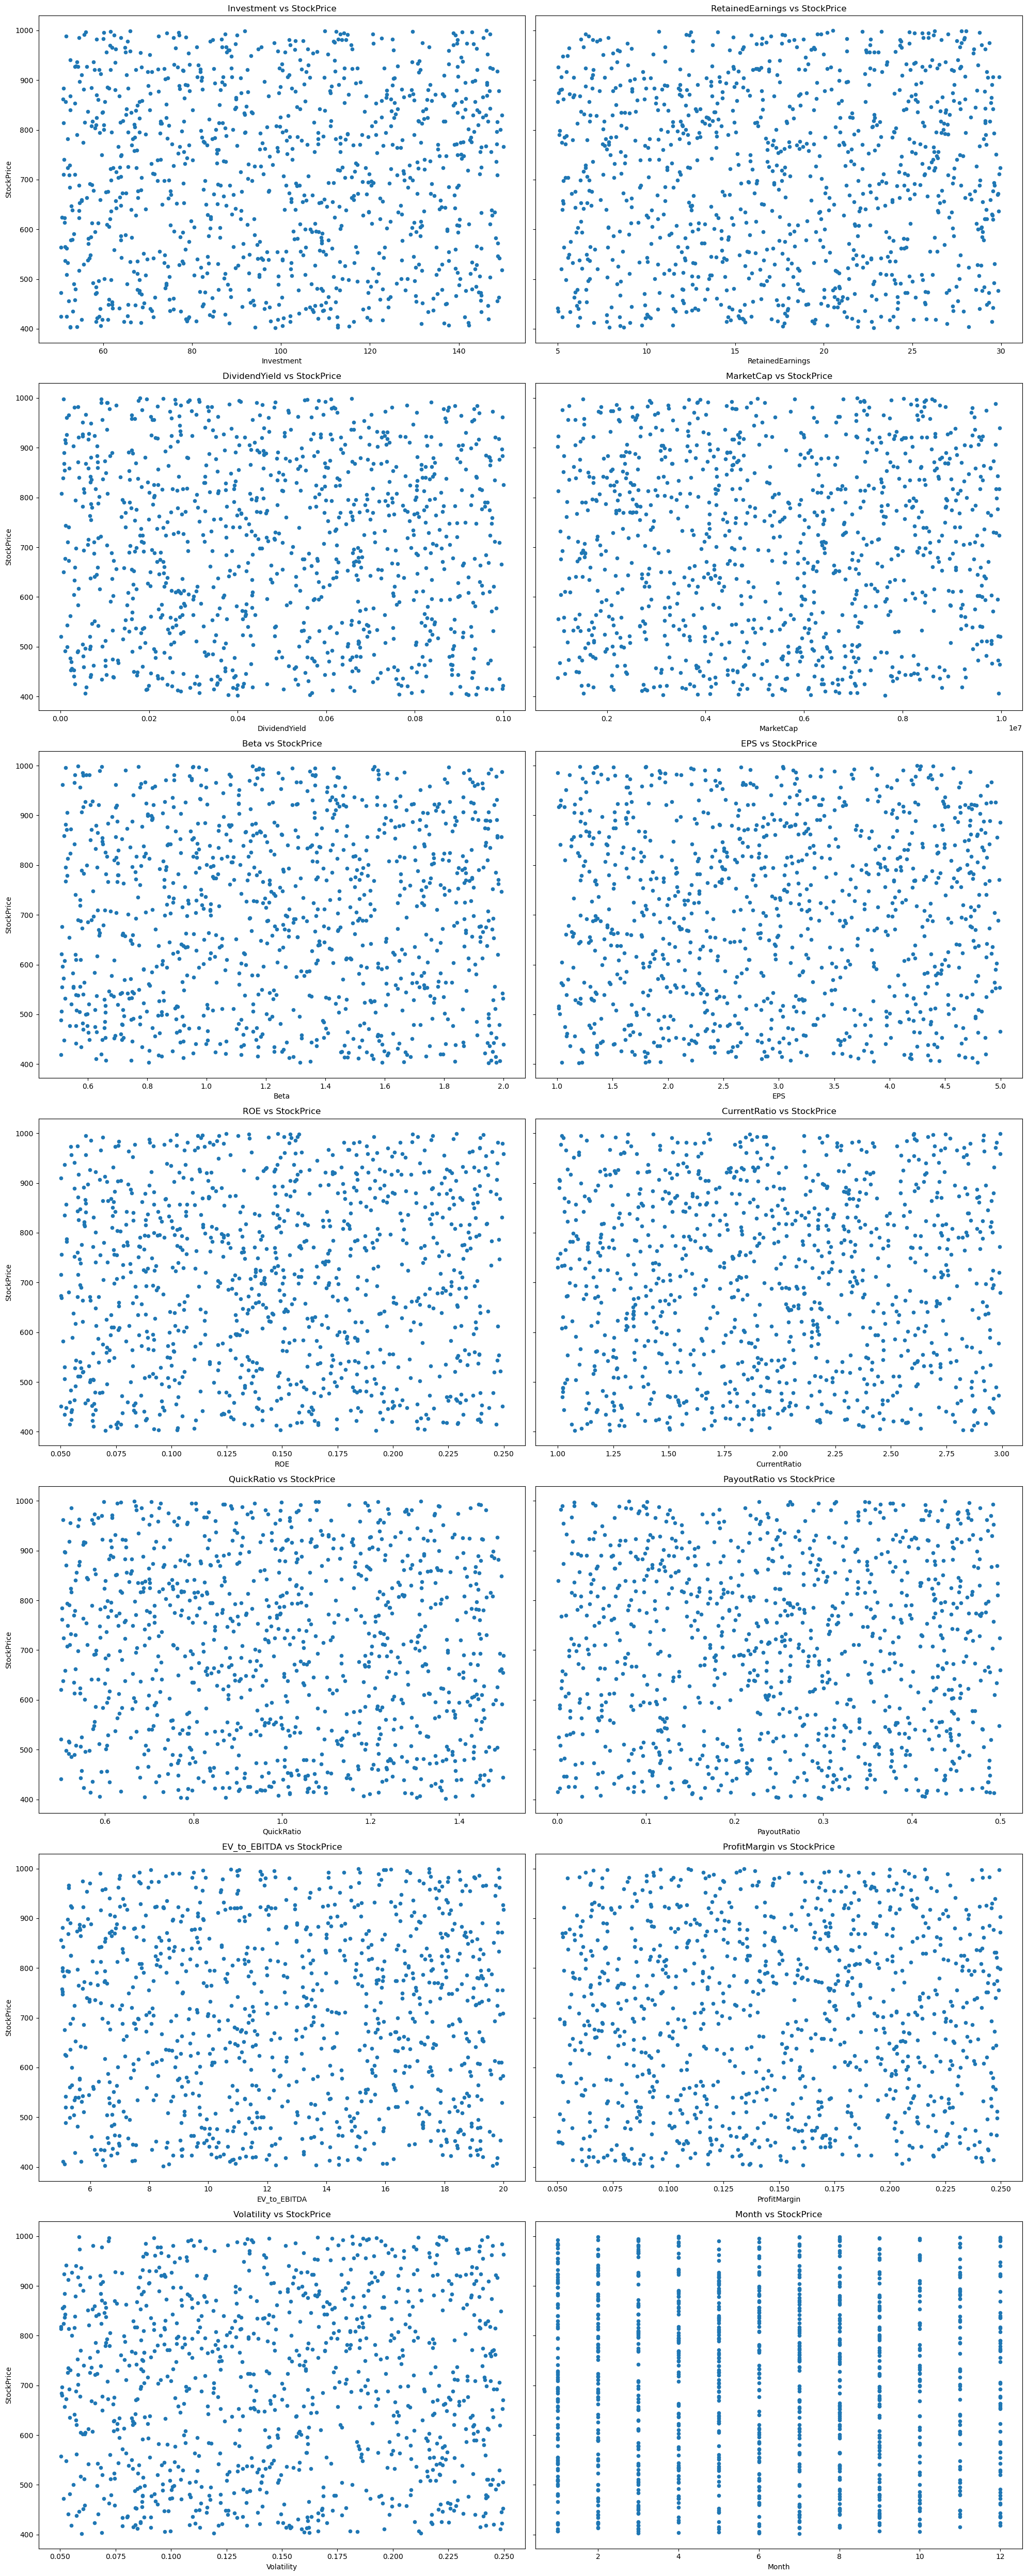

In [33]:
# Create a 13 by 2 grid of subplots
fig, axs = plt.subplots(7, 2, figsize=(20, 50), sharey=True)

# Plot each feature against the Investment.
for i, feature in enumerate(X_cols):
    row = i // 2
    col = i % 2
    data.plot(kind='scatter', x=feature, y='StockPrice', ax=axs[row, col])
    axs[row, col].set_title(f"{feature} vs StockPrice")

plt.tight_layout()
plt.show()

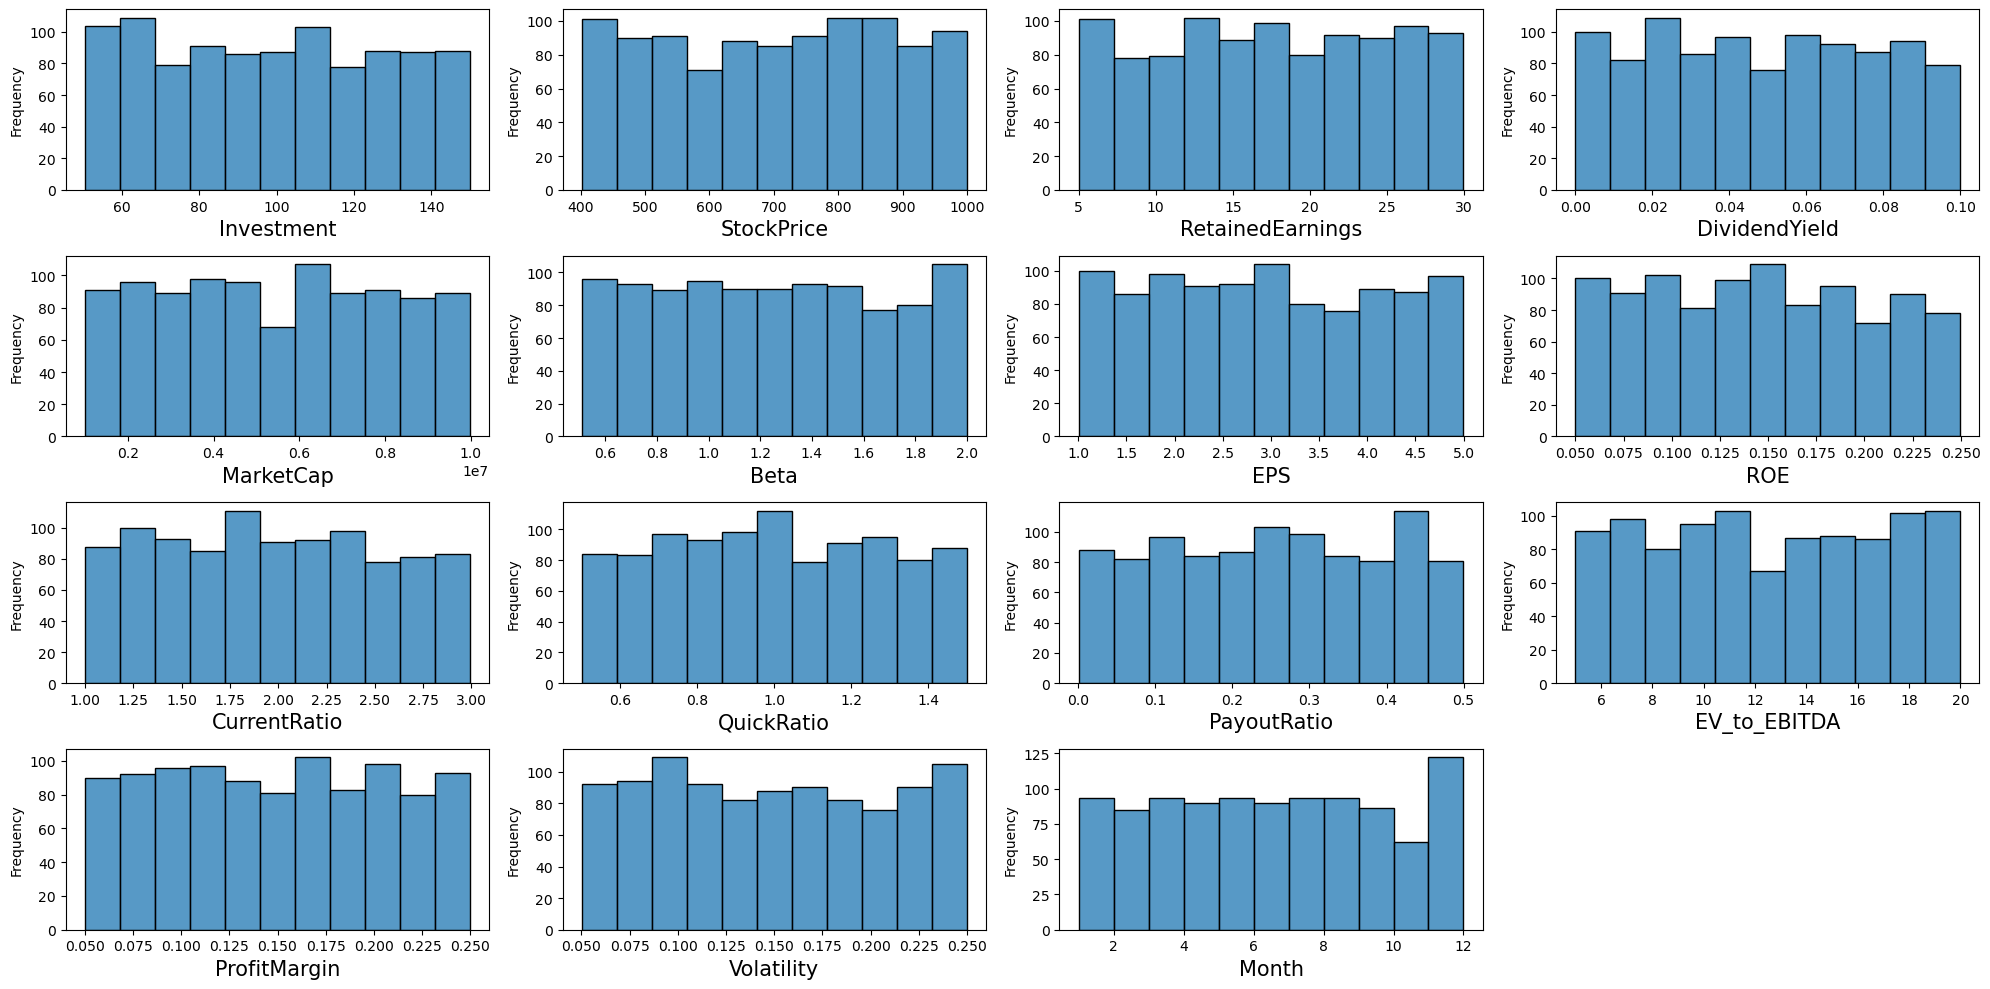

In [41]:
#distribution of every columns
plt.figure(figsize=(20, 10), facecolor='white')

num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows needed based on the number of columns

plot_number = 1
for column in data.columns:
    ax = plt.subplot(num_rows, 4, plot_number)
    sns.histplot(data[column], ax=ax)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Frequency', fontsize=10)
    plot_number += 1

plt.tight_layout()
plt.show()

In [ ]:
#Trying to Trnsform the the data to see any rel

In [20]:
data_Transform=data.copy()

feature =['Investment','RetainedEarnings','DividendYield','MarketCap','Beta','EPS','ROE','CurrentRatio','QuickRatio','PayoutRatio','EV_to_EBITDA','ProfitMargin','Volatility']
Y=data_Transform['StockPrice']
data_Transform[feature]=np.log(data_Transform[feature])

data_Transform['StockPrice']=np.log(data_Transform['StockPrice'])


In [ ]:
data_Transform[Y]=np.log(data[Y])

In [14]:
#correlations = data_Transform.corr()
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111)
#cax =  ax.matshow(correlations, vmin=-1, vmax=1)
#fig.colorbar(cax)

# Set xticks and yticks
#ax.set_xticks(np.arange(len(data_Transform.columns)))
#ax.set_yticks(np.arange(len(data_Transform.columns)))

# Set xticklabels and yticklabels
#ax.set_xticklabels(data_Transform.columns, rotation=45, ha='left')
#ax.set_yticklabels(data_Transform.columns)

#plt.show()

corr_matrix=data_Transform.corr().abs()
corr_matrix

,Date,Investment,StockPrice,RetainedEarnings,DividendYield,MarketCap,Beta,EPS,ROE,CurrentRatio,QuickRatio,PayoutRatio,EV_to_EBITDA,ProfitMargin,Volatility
Date,1.000000,0.018749,0.038855,0.010599,0.006624,0.011463,0.010211,0.003897,0.033162,0.004517,0.029584,0.027621,0.048575,0.022583,0.008320
Investment,0.018749,1.000000,0.028700,0.015976,0.007497,0.047806,0.053585,0.003963,0.030466,0.044902,0.056258,0.014674,0.015093,0.010848,0.007705
StockPrice,0.038855,0.028700,1.000000,0.017386,0.013447,0.021994,0.036924,0.039344,0.053042,0.001111,0.065747,0.022439,0.016695,0.037546,0.019924
RetainedEarnings,0.010599,0.015976,0.017386,1.000000,0.029512,0.002758,0.028325,0.036277,0.057667,0.019307,0.006972,0.058048,0.061962,0.031016,0.009837
DividendYield,0.006624,0.007497,0.013447,0.029512,1.000000,0.022421,0.040725,0.002479,0.007078,0.030800,0.018990,0.006630,0.036393,0.056826,0.029393
MarketCap,0.011463,0.047806,0.021994,0.002758,0.022421,1.000000,0.051613,0.041359,0.002295,0.028427,0.015065,0.050732,0.040966,0.014259,0.009862
Beta,0.010211,0.053585,0.036924,0.028325,0.040725,0.051613,1.000000,0.000856,0.016813,0.030944,0.009778,0.056341,0.037734,0.020478,0.039453
EPS,0.003897,0.003963,0.039344,0.036277,0.002479,0.041359,0.000856,1.000000,0.037294,0.007609,0.005964,0.091085,0.003193,0.042929,0.004371
ROE,0.033162,0.030466,0.053042,0.057667,0.007078,0.002295,0.016813,0.037294,1.000000,0.047625,0.001491,0.050567,0.002222,0.041070,0.000534
CurrentRatio,0.004517,0.044902,0.001111,0.019307,0.030800,0.028427,0.030944,0.007609,0.047625,1.000000,0.018457,0.009525,0.024917,0.007589,0.016168


In [7]:
data_Transform.head(5)

,Date,Investment,StockPrice,RetainedEarnings,DividendYield,MarketCap,Beta,EPS,ROE,CurrentRatio,QuickRatio,PayoutRatio,EV_to_EBITDA,ProfitMargin,Volatility
0,2020-01-01,4.471113,511.079757,2.446048,-2.699036,15.631631,0.086593,1.278995,-2.851461,0.892218,0.346124,-1.677608,2.564600,-1.710025,-1.407054
1,2020-01-02,4.977226,725.140568,2.413632,-2.529886,15.925589,0.190747,0.524460,-2.437781,0.864815,0.025044,-1.793024,1.955646,-2.718002,-2.929297
2,2020-01-03,4.813804,923.767502,3.319856,-3.687010,15.874934,0.577636,1.501759,-1.531324,0.175220,0.202868,-2.429544,2.629630,-2.318044,-1.429075
3,2020-01-04,4.699260,839.334932,2.419359,-2.772790,14.684751,0.009957,1.239088,-1.592809,1.045614,-0.066088,-1.191934,2.274369,-1.586035,-2.089609
4,2020-01-05,4.183604,883.936689,2.467993,-2.861646,14.667047,0.590269,0.487853,-2.119193,0.759377,0.122248,-1.434174,1.755308,-1.859585,-2.956164


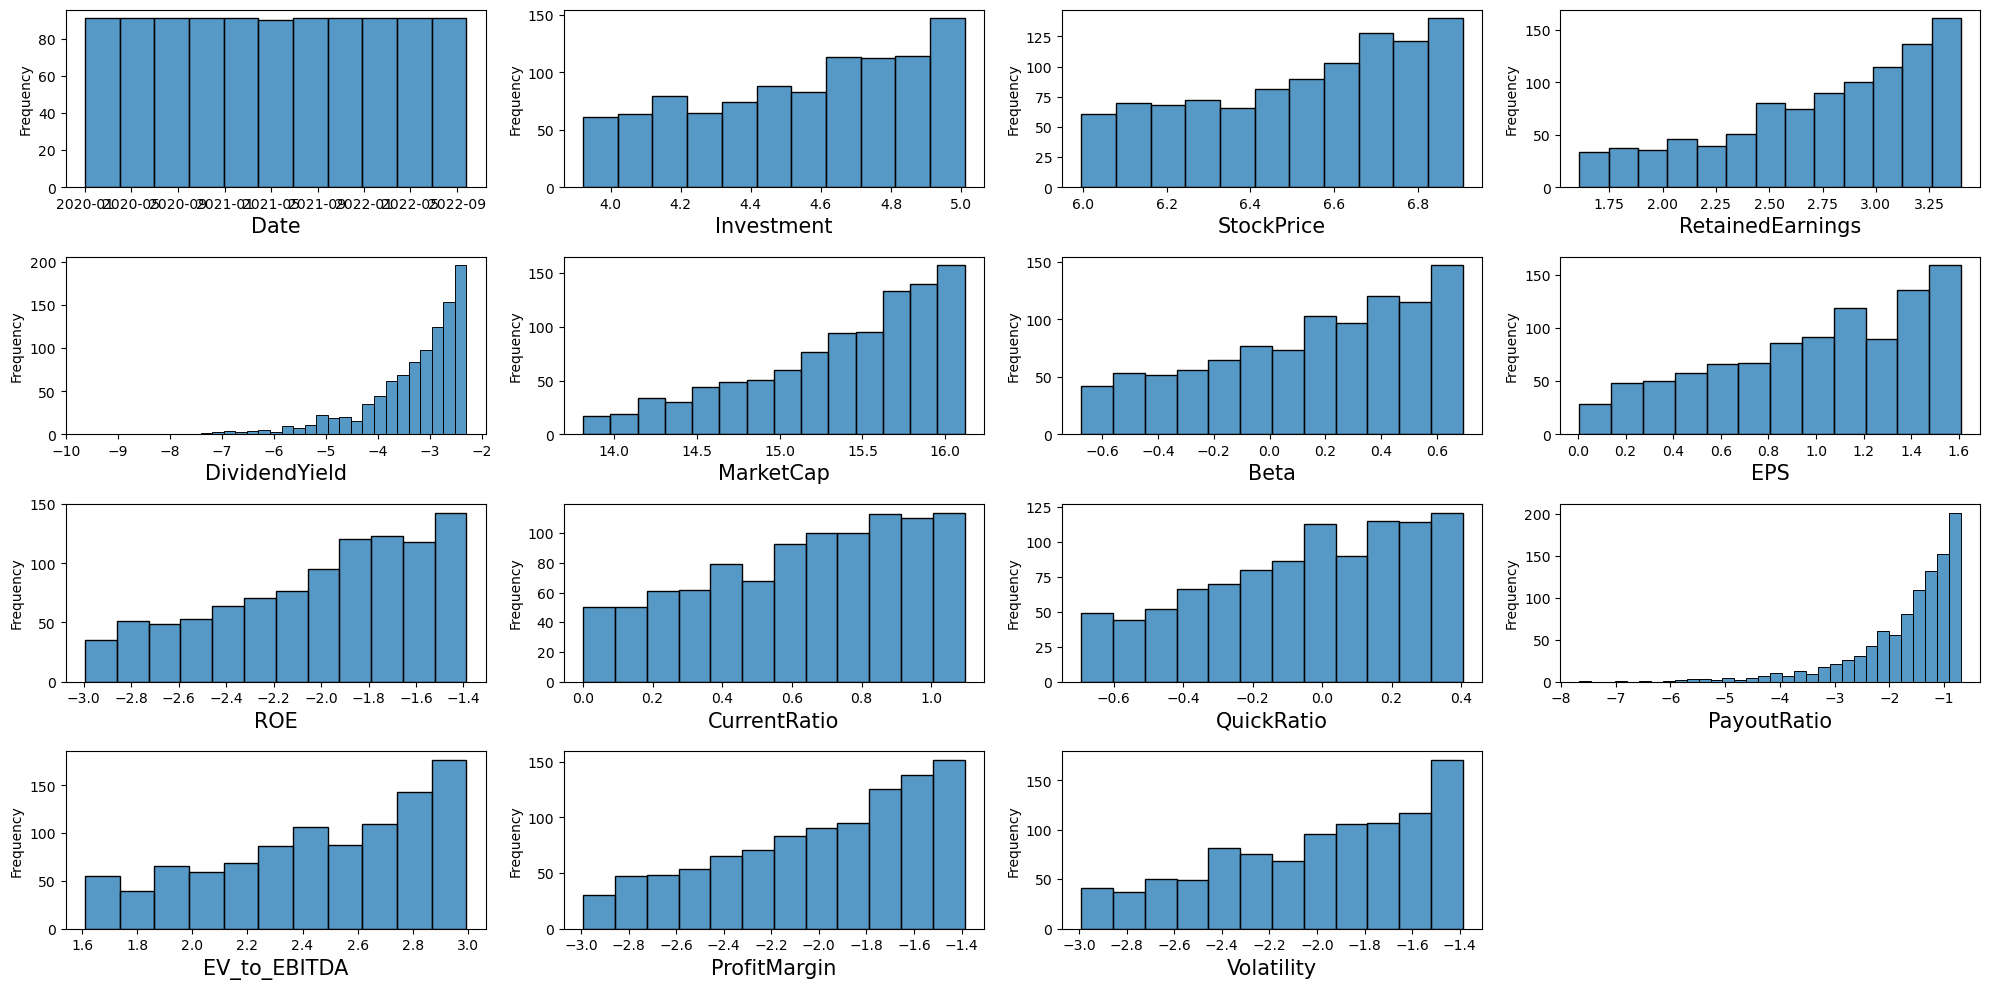

In [21]:
#distribution of every columns
plt.figure(figsize=(20, 10), facecolor='white')

num_cols = len(data_Transform.columns)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows needed based on the number of columns

plot_number = 1
for column in data_Transform.columns:
    ax = plt.subplot(num_rows, 4, plot_number)
    sns.histplot(data_Transform[column], ax=ax)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Frequency', fontsize=10)
    plot_number += 1

plt.tight_layout()
plt.show()

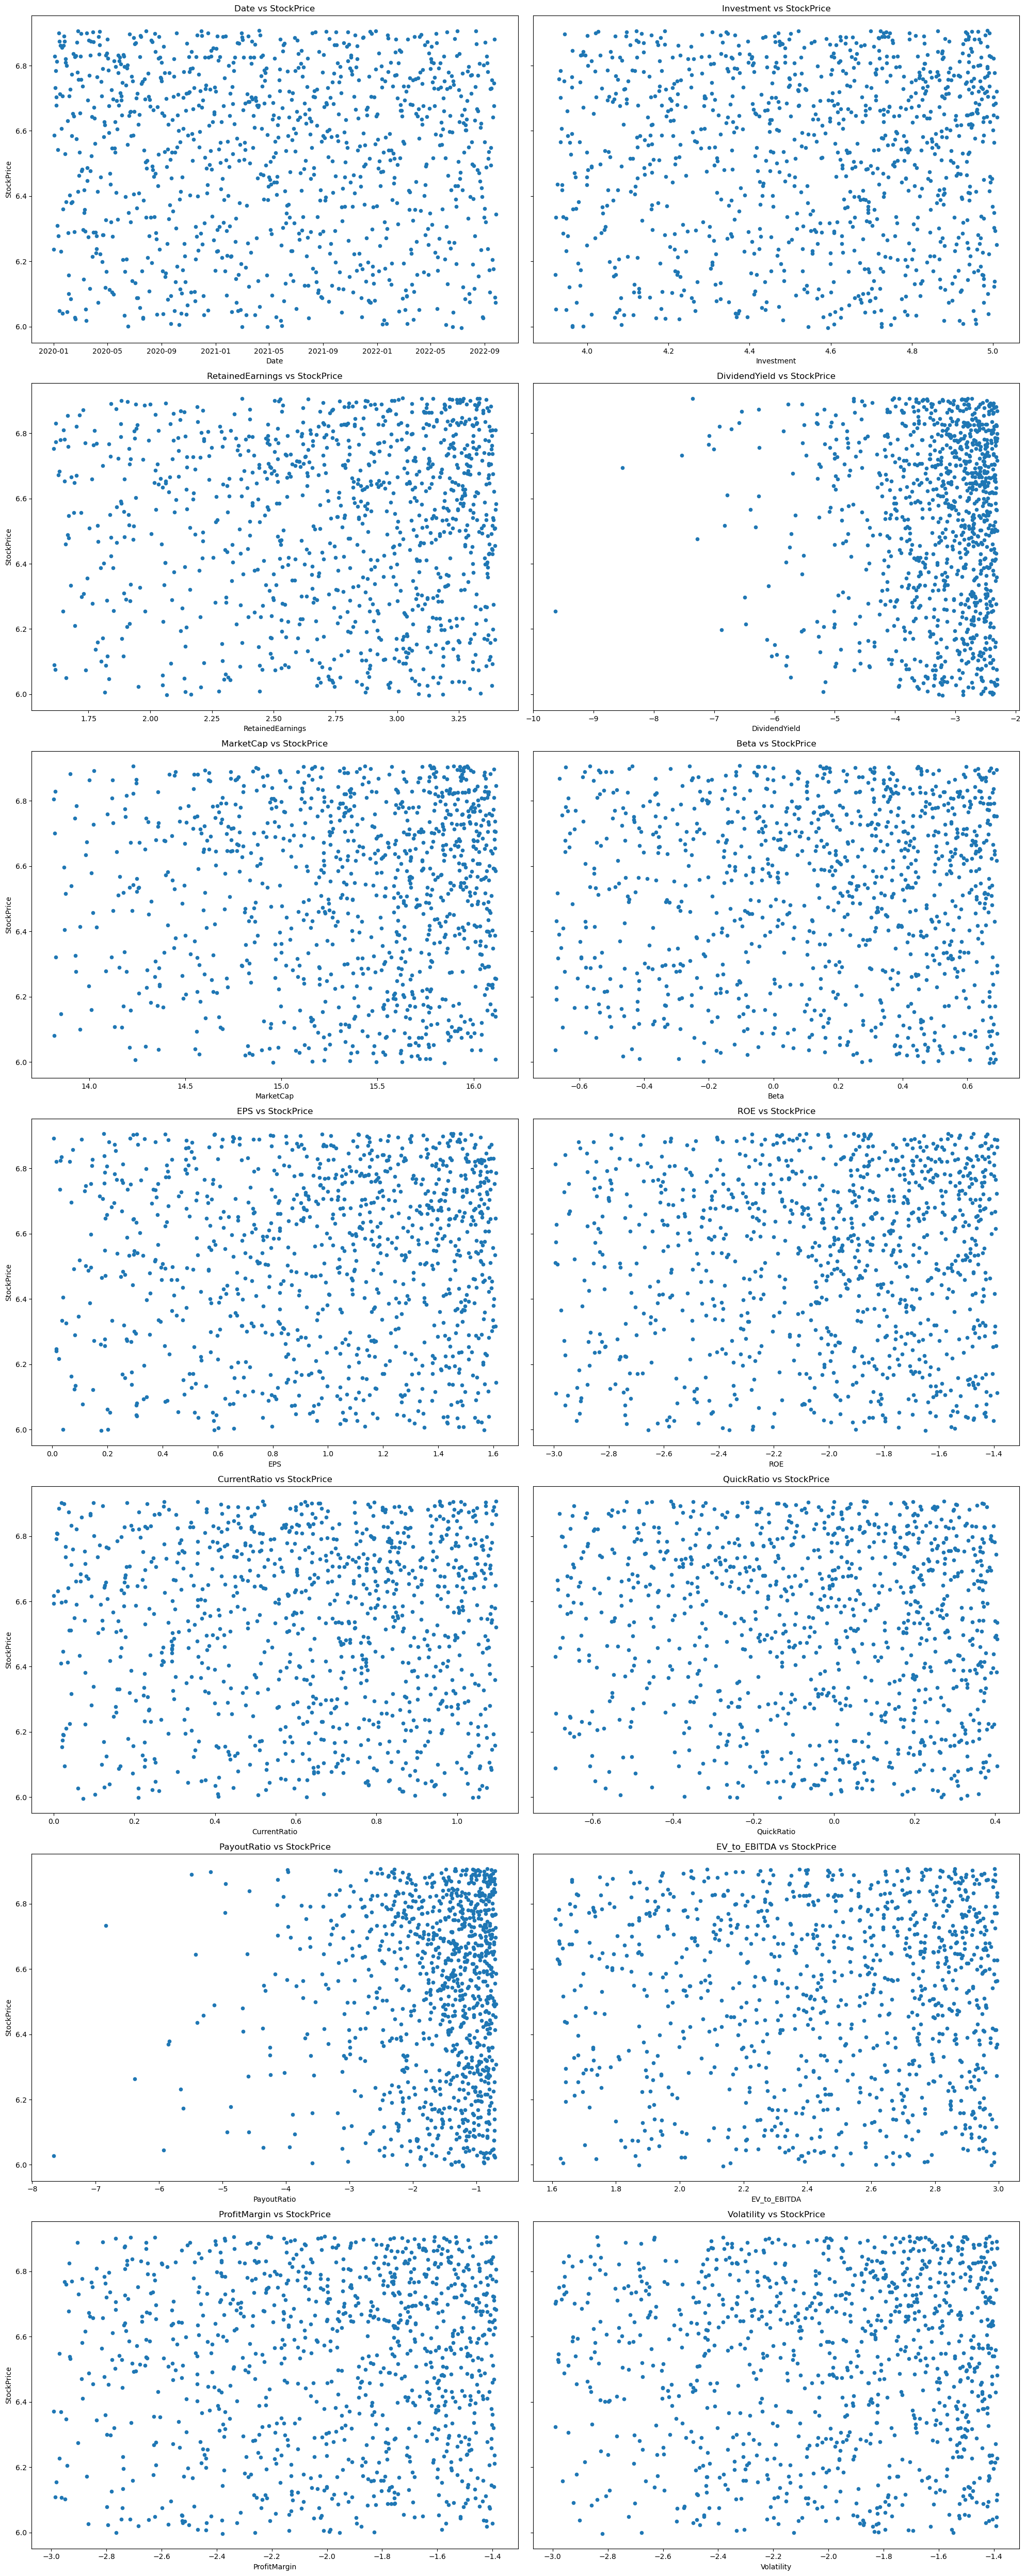

In [22]:
X_col = [col for col in  data_Transform.columns if col != 'StockPrice']

# Create a 13 by 2 grid of subplots
fig, axs = plt.subplots(7, 2, figsize=(20, 50), sharey=True)

# Plot each feature against the Investment.
for i, feature in enumerate(X_col):
    row = i // 2
    col = i % 2
    data_Transform.plot(kind='scatter', x=feature, y='StockPrice', ax=axs[row, col])
    axs[row, col].set_title(f"{feature} vs StockPrice")

plt.tight_layout()
plt.show()

In [31]:
data_Transform.describe(include='all')

,Date,Investment,StockPrice,RetainedEarnings,DividendYield,MarketCap,Beta,EPS,ROE,CurrentRatio,QuickRatio,PayoutRatio,EV_to_EBITDA,ProfitMargin,Volatility
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2021-05-14 12:00:00,4.548514,6.523901,2.761168,-3.322350,15.365510,0.153482,1.002208,-2.008207,0.635651,-0.046486,-1.673468,2.461078,-1.986356,-1.995566
min,2020-01-01 00:00:00,3.921244,5.996280,1.609496,-9.635920,13.815787,-0.674766,0.005697,-2.994769,0.000486,-0.693042,-7.659546,1.609911,-2.990929,-2.990412
25%,2020-09-06 18:00:00,4.298604,6.300133,2.445279,-3.721813,14.980141,-0.134595,0.673397,-2.331009,0.404642,-0.268999,-2.068975,2.174929,-2.306880,-2.333389
50%,2021-05-14 12:00:00,4.601972,6.567010,2.863078,-3.027679,15.511376,0.211560,1.077924,-1.918697,0.671616,-0.004825,-1.373643,2.519048,-1.910759,-1.920825
75%,2022-01-19 06:00:00,4.823759,6.752596,3.177120,-2.607019,15.851514,0.476096,1.392738,-1.645618,0.888636,0.212056,-0.971933,2.809696,-1.606240,-1.607353
max,2022-09-26 00:00:00,5.010447,6.907403,3.399380,-2.303027,16.116068,0.692660,1.609006,-1.387171,1.095951,0.405135,-0.693474,2.995233,-1.387336,-1.387219
std,NaN,0.312921,0.262680,0.485172,0.986102,0.583200,0.381180,0.436299,0.436395,0.302755,0.301120,0.985743,0.391072,0.432684,0.442458


In [32]:
data_Transform=data_Transform.drop('Date', axis=1 )

# Importing Regression modelling packages

In [29]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,LassoCV,Lasso
from sklearn.model_selection import train_test_split

In [45]:
#create X and y
#features=[col for col in data_Transform.columns if col != 'StockPrice']
feature =['Investment','RetainedEarnings','DividendYield','MarketCap','Beta','EPS','ROE','CurrentRatio','QuickRatio','EV_to_EBITDA','ProfitMargin','Volatility']

X=data_Transform[feature]
y=data_Transform.StockPrice

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)

# R-squared value
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))

# Mean squared error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Coefficients: [0.01080799 0.01622094]
Intercept: 6.584275130178881
R-squared: -0.0137328623819708
Mean Squared Error: 0.07070770143745878


In [28]:
X.shape

(1000,)

In [46]:
#more information from the model
X=sm.add_constant(X)
l_m=sm.OLS(y,X,data=data_Transform).fit()
l_m.conf_int()
l_m.summary()

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             StockPrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9493
Date:                Sat, 06 Apr 2024   Prob (F-statistic):              0.387
Time:                        21:58:56   Log-Likelihood:                -80.668
No. Observations:                1000   AIC:                             167.3
Df Residuals:                     997   BIC:                             182.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5911      0.054    121.486      0.000       6.485       6.698
ProfitMargin     0.0249      0.019      1.296      0.195      -0.013       0.063
Volatility       0.0089      0.019      0.473      0.636      -0.028       0.046
==============================================================================
Omnibus:                      361.994   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.957
Skew:                          -0.362   Prob(JB):                     3.91e-16
Kurtosis:                       1.914   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 5 features
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_train, y_train)


# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Print the selected feature names
print(selected_features)


Index(['ProfitMargin', 'Volatility'], dtype='object')


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [46]:
# Fit the linear regression model
model2 = LinearRegression()
model2.fit(X_train[selected_features], y_train)

# Coefficients
print("Coefficients:", model2.coef_)

# Intercept
print("Intercept:", model2.intercept_)

# R-squared value
y_pred2 = model2.predict(X_test[selected_features])
print("R-squared:", r2_score(y_test, y_pred))

# Mean squared error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Coefficients: [-68.17189774   9.37098878   0.26712469  58.9024086   91.266058  ]
Intercept: 748.5293233139301
R-squared: -0.049536993178110444
Mean Squared Error: 32044.90218071728


In [47]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale all the columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()  # Reshape y to 2D array before scaling

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Instantiate the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha (regularization strength) parameter as needed

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.0276362045848486
R-squared: -0.015582480564535928
